## 'Uber Pick Ups in NYC' EDA

The dataset is analyzed to find the busiest periods in the month of September, 2014. 

Link to the Dataset: - https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city?select=uber-raw-data-sep14.csv



In [1]:
#importing libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [27]:
#importing the dataset to be analyzed
df = pd.read_csv("Data/uber-raw-data-sep14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [28]:
#checking the dimensions of the dataset
df.shape

(1028136, 4)

In [29]:
#checking the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [30]:
#Converting datatype of Date/Time Column
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

#Creating individual columns for date components
df['Day'] = pd.DatetimeIndex(df['Date/Time']).day
df['Weekday'] = pd.DatetimeIndex(df['Date/Time']).weekday
df['Weekday name'] = pd.DatetimeIndex(df['Date/Time']).day_name()
df['Hour'] = pd.DatetimeIndex(df['Date/Time']).hour


In [40]:
df.head(1000)
#It worked!

,Date/Time,Lat,Lon,Base,Day,Weekday,Weekday name,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,Monday,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,Monday,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,Monday,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,Monday,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,Monday,0
...,...,...,...,...,...,...,...,...
995,2014-09-02 11:11:00,40.7381,-73.9878,B02512,2,1,Tuesday,11
996,2014-09-02 11:14:00,40.7848,-73.9560,B02512,2,1,Tuesday,11
997,2014-09-02 11:14:00,40.7848,-73.9560,B02512,2,1,Tuesday,11
998,2014-09-02 11:17:00,40.7741,-73.9608,B02512,2,1,Tuesday,11


In [35]:
#Identifying the busiest days of the week
df['Weekday name'].value_counts()

Tuesday      163230
Saturday     162057
Friday       160380
Thursday     153276
Monday       137288
Wednesday    135373
Sunday       116532
Name: Weekday name, dtype: int64

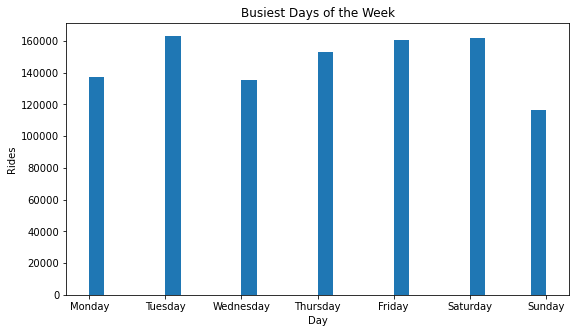

In [34]:
#Visualizing the busiest days of the week
fig, ax = plt.subplots(figsize=(9,5))
plt.hist(df['Weekday name'], width=0.2, bins=30, align='mid', )
plt.title(label = "Busiest Days of the Week", loc='center')
plt.xlabel('Day')
plt.ylabel('Rides');

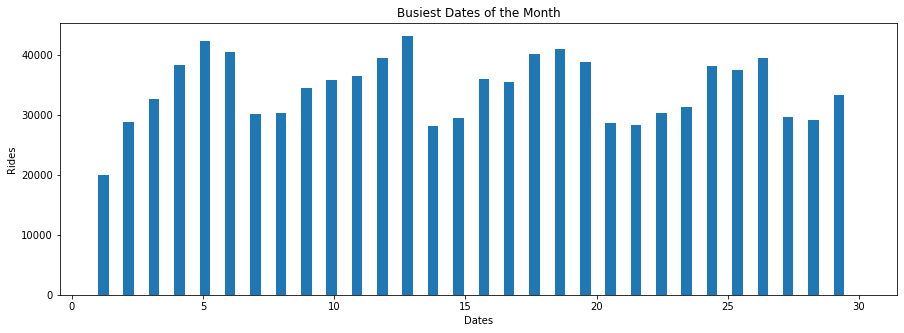

In [10]:
#Identifying the busiest Dates of the Month
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df['Day'], width=0.4, bins=30, align='mid' )
plt.title(label = "Busiest Dates of the Month", loc='center')
plt.xlabel('Dates')
plt.ylabel('Rides');

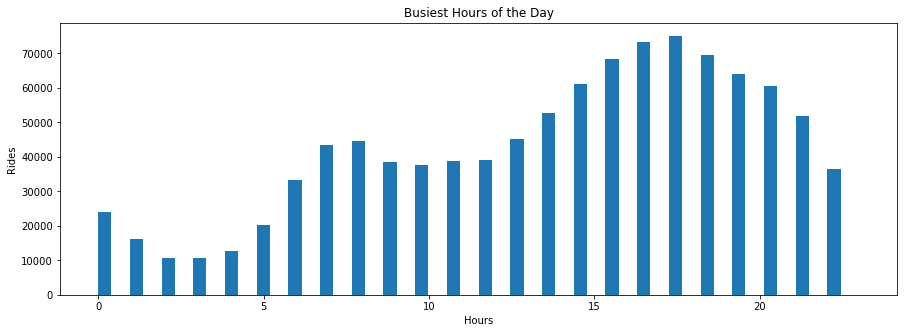

In [11]:
#Identifying the busiest hours of the day
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df['Hour'], width=0.4, bins=24, align='mid' )
plt.title(label = "Busiest Hours of the Day", loc='center')
plt.xlabel('Hours')
plt.ylabel('Rides');

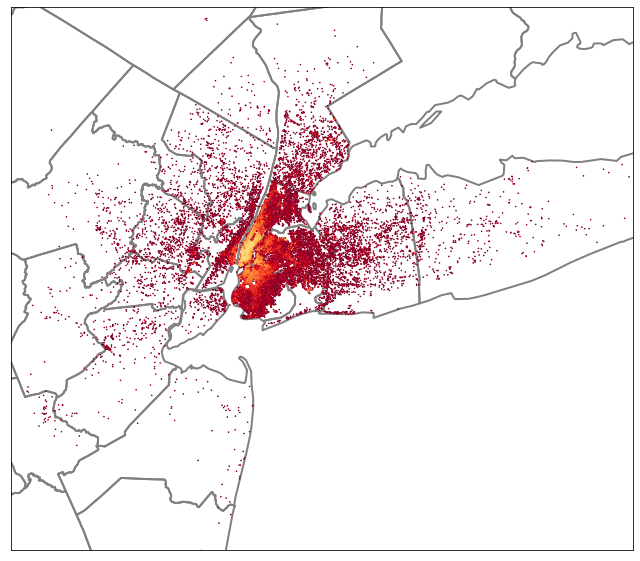

In [24]:
#visualizing rides on a map
w, s, e, n = -74.77, 39.99 ,-72.72, 41.3476

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=s, urcrnrlat=n,
            llcrnrlon=w, urcrnrlon=e, lat_ts=s, resolution='i')
m.drawcounties(color='grey', linewidth=2)

x, y = m(df['Lon'].values, df['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r);

# Observations

1. Tuesdays appear to be the busiest day of the week while Saturday is a close second. 

2. The weeks appear to be cyclical, rising through the week and taking a sharp decline on Sundays before beginning an ascent again.

3. Majority of the rides are concentrated in the metropolitan New York City and surrounding regions. The frequency tends to decline the further away from the mainland city one looks.